In [ ]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns; sns.set()  # Para el plot styling

In [ ]:
#Install and import RDKit utilities
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 12.1 MB/s eta 0:00:00


In [ ]:
class RDKit_2D:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def compute_2Drdkit(self, name):
        rdkit_2d_desc = []
        calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        header = calc.GetDescriptorNames()
        for i in range(len(self.mols)):
            ds = calc.CalcDescriptors(self.mols[i])
            rdkit_2d_desc.append(ds)
        df = pd.DataFrame(rdkit_2d_desc,columns=header)
        df.insert(loc=0, column='smiles', value=self.smiles)
        df.to_csv(name[:-4]+'_RDKit_2D.csv', index=False)

In [ ]:
descriptors_list = [x[0] for x in Descriptors._descList]

In [ ]:
def compute_2Drdkit(self, name):
  rdkit_2d_desc = []
  calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
  header = calc.GetDescriptorNames()
  for i in range(len(self.mols)):
    ds = calc.CalcDescriptors(self.mols[i])
    rdkit_2d_desc.append(ds)
    df = pd.DataFrame(rdkit_2d_desc,columns=header)
    df.insert(loc=0, column='smiles', value=self.smiles)
    df.to_csv(name[:-4]+'_RDKit_2D.csv', index=False)

In [ ]:
df = pd.read_csv('lipidomic.csv', sep="\t")

ParserError: Error tokenizing data. C error: Expected 3 fields in line 203, saw 4


In [ ]:
df

,group,LMID,Name,isomeric SMILES
0,0,LMGP04010320,PG(18:0/22:1(11Z)),CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OC[C@H...
1,0,LMGP04010957,PG(18:1(9Z)/22:0),CCCCCCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCC...
2,0,LMGP04010505,PG(19:1(9Z)/21:0),CCCCCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCCC...
3,0,LMGP04010949,PG(20:0/20:1(11Z)),CCCCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OC[C...
4,0,LMGP04010547,PG(20:1(11Z)/20:0),CCCCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCC...
...,...,...,...,...
172,51,LMGP01060007,PC(O-14:0/0:0),CCCCCCCCCCCCCCOC[C@H](COP(=O)([O-])OCC[N+](C)(...
173,52,-,Lucidenic acid I,CC(CCC(=O)O)C1CC(=O)C2(C1(CC(=O)C3=C2C(=O)CC4C...
174,53,LMSP01040003,C17 Sphinganine,CCCCCCCCCCCCCC[C@H]([C@H](CO)N)O
175,54,LMFA12000204,12Z-Nonadecen-9-one,CCCCCCCCC(=O)CC/C=C\CCCCCC


In [ ]:
RDKit_descriptor = RDKit_2D(df["Isomeric SMILES"])       # create your RDKit_2D object and provide smiles
RDKit_descriptor.compute_2Drdkit('descriptors.csv') # compute RDKit_2D and provide the name of your desired output file.

KeyError: 'Isomeric SMILES'

In [ ]:
descriptors = pd.read_csv("descriptors_RDKit_2D.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'descriptors_RDKit_2D.csv'

In [ ]:
descriptors

NameError: name 'descriptors' is not defined

In [ ]:
#Verificar valores Not A Number por columna
NaN = descriptors.isna().sum()
print(NaN)

smiles               0
MaxAbsEStateIndex    0
MaxEStateIndex       0
MinAbsEStateIndex    0
MinEStateIndex       0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 211, dtype: int64


In [ ]:
#Verificar valores nulos por columna
null = descriptors.isnull().sum()
print(null)

In [ ]:
#Verificar columnas con valores únicos
for col in descriptors.columns:
    if len(descriptors[col].unique()) == 1:
        descriptors.drop(col,inplace=True,axis=1)

In [ ]:
descriptors

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
to_drop_lipids = ['smiles']
descriptors2 = descriptors[descriptors.columns.difference(to_drop_lipids)]
normalized_variables = sc.fit_transform(descriptors2)

In [ ]:
scaled_descriptors = pd.DataFrame(normalized_variables, columns = descriptors2.columns)

In [ ]:
corr_matrix = scaled_descriptors.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
scaled_descriptors.drop(to_drop, axis=1, inplace=True)

In [ ]:
scaled_descriptors

<Axes: >

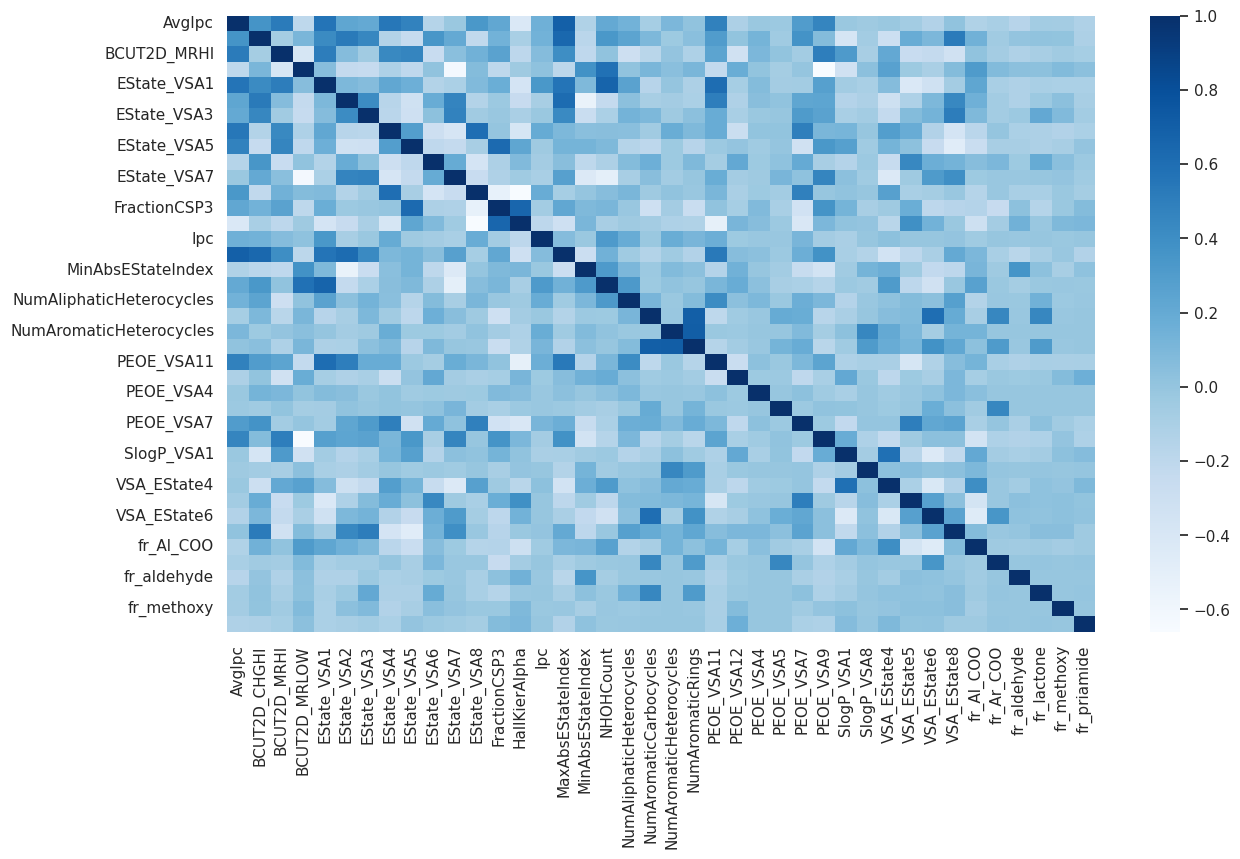

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(scaled_descriptors.corr(numeric_only=True), cmap='Blues')

In [ ]:
descriptors3 = pd.concat([df, scaled_descriptors], axis=1, join='inner')

In [ ]:
descriptors3

In [ ]:
#Definir número de clusters
lipids_identified = len(descriptors3['group'].unique())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
representative_lipids = pd.DataFrame()
for i in range(lipids_identified):
  df_i = descriptors3.loc[descriptors3['group'] == i]
  if len(df_i) == 1:
    representative_lipids = pd.concat([representative_lipids,df_i])
  else:
    df = df_i.drop(df_i[['group', 'Name','Isomeric SMILES']], axis=1)
    kmeans = KMeans(1)
    kmeans.fit(df)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
    representative_lipids = pd.concat([representative_lipids, df_i.iloc[closest]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
putative = pd.DataFrame(representative_lipids, columns =['group', 'Name', 'Isomeric SMILES'])

In [ ]:
putative

,group,Name,Isomeric SMILES
0,0,Armillarin,C[C@]12C[C@H]([C@]1(C(=C[C@H]3[C@@H]2CC(C3)(C)...
5,1,4S-aminopentanoic acid,C[C@@H](CCC(=O)O)N
7,2,Palmitaldehyde,CCCCCCCCCCCCCCCC=O
8,3,Leiopathic acid,CC/C=C\C/C=C\C/C=C\C=C\[C@@H](C/C=C\CCCCCC(=O)O)O
9,4,13-HDoHE,CC/C=C\C/C=C\C=C\C(C/C=C\C/C=C\C/C=C\CCC(=O)O)O
...,...,...,...
258,83,"CerPE(d14:2(4E,6E)/24:1(15Z)(2OH))",CCCCCCCCC=CCCCCCCCCCCCCC(C(=O)NC(COP(=O)(O)OCC...
259,84,"(3b,24R,25x)-26-Benzoyloxystigmast-5-ene-3-ol",CCC(CCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C)...
260,85,3-Dehydroteasterone,C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC...
261,86,Torvonin A,CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC(C6C5(CCC(C6)OC...


In [ ]:
descriptors3

,group,Name,Isomeric SMILES,AvgIpc,BCUT2D_CHGHI,BCUT2D_MRHI,BCUT2D_MRLOW,EState_VSA1,EState_VSA2,EState_VSA3,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState8,fr_Al_COO,fr_Ar_COO,fr_aldehyde,fr_lactone,fr_methoxy,fr_priamide
0,0,Armillarin,C[C@]12C[C@H]([C@]1(C(=C[C@H]3[C@@H]2CC(C3)(C)...,-1.458433,2.105286,-1.258507,0.191278,-1.168684,-0.960532,1.123070,...,-0.848150,0.599932,0.269990,0.585734,-0.620152,-0.06178,11.423660,-0.06178,-0.107417,-0.06178
1,1,2-Amino-3-methylbutanoic acid,CC(C)C(C(=O)O)N,-4.629473,-0.855098,-1.326353,0.563603,-1.153736,-1.361179,-1.784492,...,1.462310,-0.108050,-0.505567,-0.283750,1.554516,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
2,1,2S-amino-pentanoic acid,CCC[C@@H](C(=O)O)N,-4.527600,-1.200256,-1.331048,0.566540,-1.153736,-1.843865,-1.001062,...,1.450172,-0.108306,-0.455206,-0.764734,1.554516,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
3,1,5-amino-pentanoic acid,C(CCN)CC(=O)O,-4.548424,-1.977099,-1.407014,0.571942,-1.448752,-1.320159,-0.202510,...,1.448046,-0.034711,0.269990,-1.148623,1.554516,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
4,1,4-amino-pentanoic acid,CC(CCC(=O)O)N,-4.718619,-1.702164,-1.405753,0.571686,-1.448752,-0.827365,-1.001062,...,1.506558,-0.050941,0.276134,-0.797130,1.554516,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,83,"CerPE(d14:2(4E,6E)/24:1(15Z)(2OH))",CCCCCCCCC=CCCCCCCCCCCCCC(C(=O)NC(COP(=O)(O)OCC...,0.237023,-0.109526,0.743443,0.591237,0.143911,-0.771169,-0.217632,...,1.527225,0.000456,-0.889150,-0.204422,-0.620152,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
259,84,"(3b,24R,25x)-26-Benzoyloxystigmast-5-ene-3-ol",CCC(CCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C)...,0.889587,1.491552,-1.136714,0.845687,-1.740226,-0.859125,2.466003,...,0.667177,2.361928,10.460545,2.423539,-0.620152,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
260,85,3-Dehydroteasterone,C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC...,0.226912,1.698134,-1.116845,0.491096,-1.144127,0.959229,4.881772,...,-0.437555,1.498250,0.269990,2.505208,-0.620152,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178
261,86,Torvonin A,CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC(C6C5(CCC(C6)OC...,1.699577,2.069422,-2.000002,-0.229635,1.839070,0.517878,3.331342,...,-0.432055,1.334644,0.269990,2.628989,-0.620152,-0.06178,-0.087538,-0.06178,-0.107417,-0.06178


[0.13029857 0.12040932]


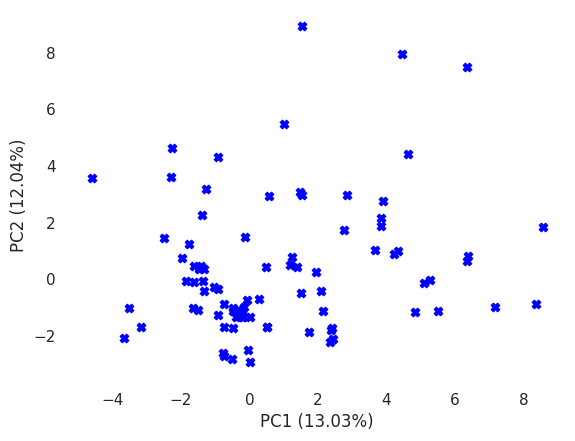

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_i = descriptors3.loc[descriptors3['group'] == 35]
pca_ =pca.fit_transform(descriptors3.drop(descriptors3[['group', 'Name','Isomeric SMILES']], axis=1))
print(pca.explained_variance_ratio_)
ax = plt.axes()
ax.set_facecolor('white')
#plt.scatter(pca_[:,0],pca_[:,1], c='black')
plt.scatter(pca_[list(putative.index),0],pca_[list(putative.index),1], c='blue', marker='X')
#plt.scatter(pca_[98,0],pca_[98,1], c='red')
plt.grid(False)
pca1= pca.explained_variance_ratio_[0]
pca2= pca.explained_variance_ratio_[1]
plt.xlabel('PC1 (' + str(round(pca1*100,2)) + "%)")
plt.ylabel('PC2 (' + str(round(pca2*100,2)) + "%)")
plt.show()
